# Introduction 📚

This project explores, visualizes and analyzes a dataset containing the Gross Domestic Product (GDP) and life expectancy of 6 countries across 16 years.

## Big Questions 🙋‍♂️

The following questions will guide the analysis:

1. How has **life expectancy** changed over time for the countries in the dataset?
2. How has **GDP** changed over time for the countries in the dataset?
3. Is there a **correlation** between GDP and life expectancy?

## Sources 📦

The dataset used in this project is provided by [codecademy](https://www.codecademy.com/), and is a combination of data from the following sources:
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688).

## Visualizations 📊

A range of visualizations (boxplots, histograms, scatter plots) will be used to explore and better understand the relationship between GDP and life expectancy for 6 countries over 16 years.

Colorblind-friendly colors are used in the plots to ensure that the data is accessible to all.

# Diving into The Data 🤿

First, the necessary libraries are installed and imported.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

Next, the data is loaded into a DataFrame which provides an efficient data structure for data manipulation and analysis. The 'head' of the data is displayed to get a sense of the data.

In [2]:
df = pd.read_csv('all_data.csv')
print(df.head(20))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

By extending the head argument to 20 rows, this output suggests that the data has been sorted by country (alphabetically) and year (ascending) with one observation per year (16 in total) for each country.

We can check data types of each column as follows:

In [3]:
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


This output shows that 'Country' is a string object, 'Year' is an integer, and 'Life expectancy and 'GDP' are both floating (decimal) numbers.

Next, a check is made for missing values in the data which may need to be addressed.

In [4]:
print(df.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


There are no missing values across the entire dataset.

Finally, the data is summarized using the 'describe' method to get a sense of the distribution of the data.

In [5]:
print(df.describe().round(2))

          Year  Life expectancy at birth (years)           GDP
count    96.00                             96.00  9.600000e+01
mean   2007.50                             72.79  3.880499e+12
std       4.63                             10.67  5.197561e+12
min    2000.00                             44.30  4.415703e+09
25%    2003.75                             74.47  1.733018e+11
50%    2007.50                             76.75  1.280220e+12
75%    2011.25                             78.90  4.067510e+12
max    2015.00                             81.00  1.810000e+13


## Interesting... 🧐

- It is striking that the minimum life expectancy is 44.3 years, despite the mean and median being 73 and 77 years, respectively. This suggests that there may be outliers in the data which will be identified later.
- A similar observation can be made for GDP, which will also be explored further.
- There are 96 rows of data. If there are 16 observations for every country (2000-2015), there would be 6 countries in the dataset but this will be confirmed in the next section.

## Country 🌍
Focusing on the 'Country' column, the number of unique countries and the number of observations for each country are determined.

In [6]:
print(df['Country'].value_counts())

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


As suspected, there are 6 countries and 16 values for each country. This is a small dataset, but hopefully sufficient for the purposes of this project.

## Year 🗓️

The number of observations per year is determined as follows:

In [7]:
print(df['Year'].value_counts())

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64


There are 6 observations for every year from 2000 to 2015 i.e. one for each of the 6 countries.

## Life expectancy 🪦

### All Countries

To help visualise the dataset metrics and data distribution separately, a stacked histogram and boxplot is preferred to a violin plot; the latter combines these two features.

There is a spread of ~40 years so 40 bins are used to give a more granular view of the data.

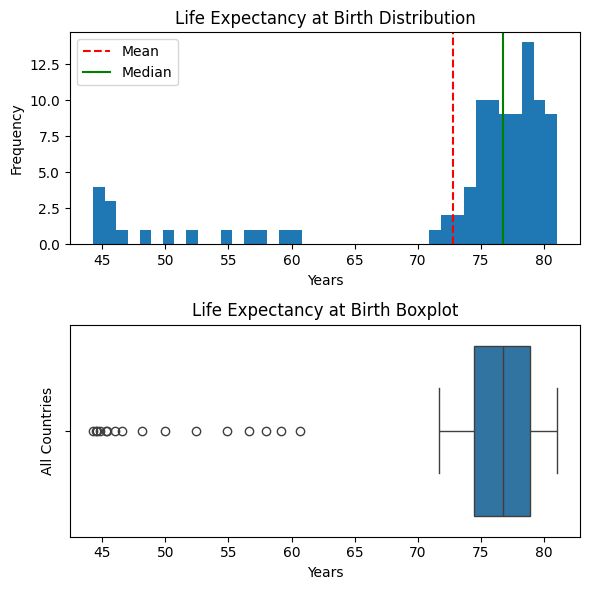

Mean: 72.8 years.
Median: 76.8 years.


In [8]:
# Histogram on 1st axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.hist(df['Life expectancy at birth (years)'], bins=40)
life_mean = np.mean(df['Life expectancy at birth (years)'])
life_median = np.median(df['Life expectancy at birth (years)'])
ax1.axvline(life_mean, color='r', linestyle='--', label='Mean')
ax1.axvline(life_median, color='g', linestyle='-', label='Median')
ax1.legend()
ax1.set_title('Life Expectancy at Birth Distribution')
ax1.set_xlabel('Years')
ax1.set_ylabel('Frequency')

# Boxplot on 2nd axis, plotted horizontally
sns.boxplot(x='Life expectancy at birth (years)', data=df)
ax2.set_title('Life Expectancy at Birth Boxplot')
ax2.set_ylabel('All Countries')
ax2.set_xlabel('Years')

plt.tight_layout()
plt.show()

# Print the mean and median of life expectancy
print(f'Mean: {life_mean:.1f} years.')
print(f'Median: {life_median:.1f} years.')

The mean is significantly lower than the median, meaning that the data is **negatively** skewed (tail to left).

There are a significant number of outliers below the lower bound i.e. less than Q1 - 1.5 * IQR. This is quantified as follows:

In [9]:
life = df['Life expectancy at birth (years)']
life_Q1 = life.quantile(0.25)
life_Q3 = life.quantile(0.75)
life_IQR = life_Q3 - life_Q1
life_lower_bound = life_Q1 - 1.5 * life_IQR
life_outliers_below = life[life < life_lower_bound].count()

print(f"Lower bound: {life_lower_bound:.1f} years.")
print(f"Number of outliers below the lower bound: {life_outliers_below} observations.")
print(f"Q1: {life_Q1:.1f} years.")
print(f"Q3: {life_Q3:.1f} years.")

Lower bound: 67.8 years.
Number of outliers below the lower bound: 16 observations.
Q1: 74.5 years.
Q3: 78.9 years.


#### Interesting... 🤔

- Half the observations have a life expectancy between 75 and 79 years i.e. the interquartile range.
- 16 out of 96 (17%) observations are outliers, and all are below the lower bound of 67.8 years. This is the number of observations per country so might be attributed to one country, but will be further investigated in the next section.
- The data is negatively-skewed (tail to left), with the **mean** life expectancy (~73 years) being **lower** than the **median** life expectancy (~77 years).

### Country Focus 🔍

OK, let's zoom in on the life expectancy of each country to see if the outliers are due to one country or spread across multiple countries.

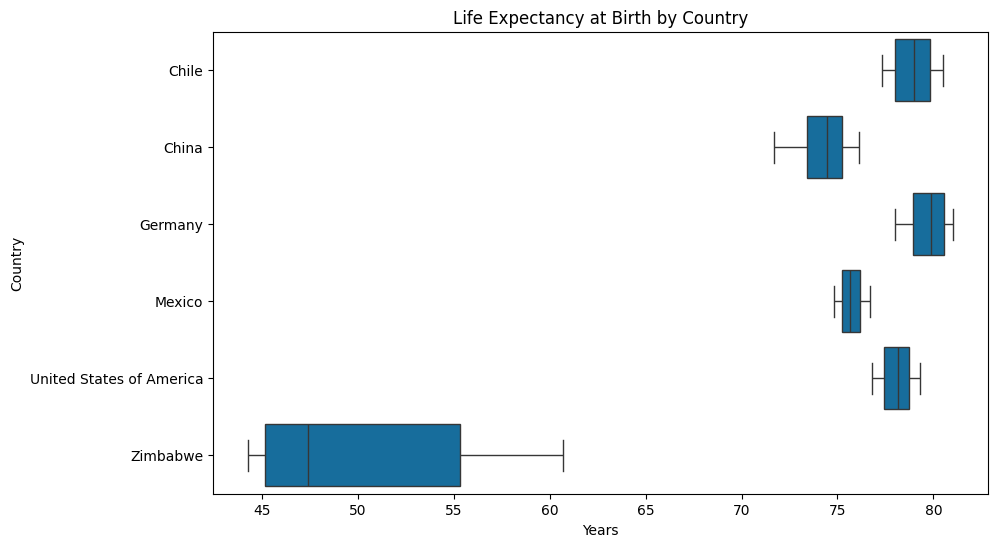

Median Life expectancy at birth (years) per country, descending:
Germany: 79.8
Chile: 79.0
United States of America: 78.2
Mexico: 75.7
China: 74.5
Zimbabwe: 47.4


In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Life expectancy at birth (years)', y='Country', data=df)
plt.title('Life Expectancy at Birth by Country')
plt.xlabel('Years')
plt.ylabel('Country')
plt.show()

countries = ['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe']

print('Median Life expectancy at birth (years) per country, descending:')
for country in countries:
    life_median = df[df['Country'] == country]['Life expectancy at birth (years)'].median()
    print(f"{country}: {life_median:.1f}")


#### Interesting... 🤔

- Germany has the longest life expectancy, followed by Chile, China, Mexico, the United States, and Zimbabwe.
- Zimbabwe's median life expectancy (~47 years) is around 30 years lower than the next lowest country in the dataset (China).
- As suspected in the previous section, all the outliers are from Zimbabwe, with the lowest life expectancy being ~44 years.

## GDP 💰

### All Countries

As before, a stacked histogram and boxplot is used to visualise the data distribution and metrics separately for GDP across all countries.

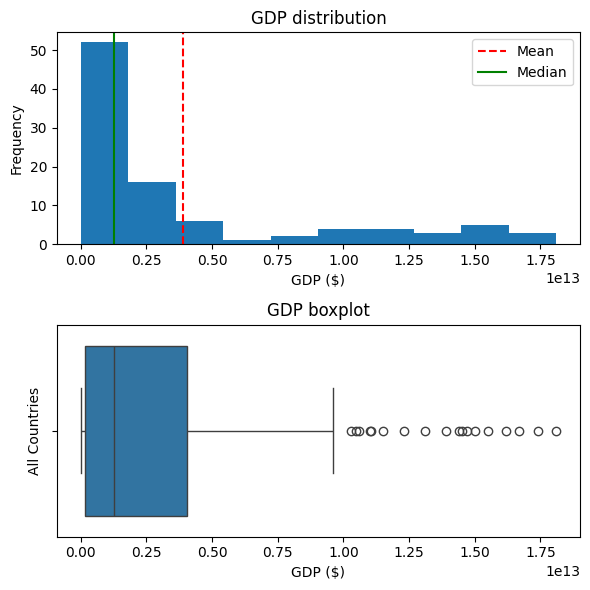

Mean: 3.88E+12.
Median: 1.28E+12.


In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Histogram on 1st axis
ax1.hist(df['GDP'])
gdp_mean = np.mean(df['GDP'])
gdp_median = np.median(df['GDP'])
ax1.axvline(gdp_mean, color='r', linestyle='--', label='Mean')
ax1.axvline(gdp_median, color='g', linestyle='-', label='Median')
ax1.legend()
ax1.set_title('GDP distribution')
ax1.set_xlabel('GDP ($)')
ax1.set_ylabel('Frequency')

# Boxplot on 2nd axis, plotted horizontally
sns.boxplot(x='GDP', data=df)
ax2.set_title('GDP boxplot')
ax2.set_ylabel('All Countries')
ax2.set_xlabel('GDP ($)')

plt.tight_layout()
plt.show()

print(f'Mean: {gdp_mean:.2E}.')
print(f'Median: {gdp_median:.2E}.')

This time, the mean is significantly **higher** than the median, suggesting that the data is **positively**-skewed (tail to right).

There are also a significant number of outliers above the upper bound i.e. more than Q3 + 1.5 * IQR. This is quantified as follows:

In [12]:
gdp = df['GDP']
gdp_Q1 = gdp.quantile(0.25)
gdp_Q3 = gdp.quantile(0.75)
gdp_IQR = gdp_Q3 - gdp_Q1
gdp_upper_bound = gdp_Q3 + 1.5 * gdp_IQR
gdp_outliers_above = gdp[gdp > gdp_upper_bound].count()

print(f"Upper bound: $ {gdp_upper_bound:.2E}.")
print(f"Number of outliers above the upper bound: {gdp_outliers_above} observations.")
print(f"Q1: {gdp_Q1:.2E}")
print(f"Q3: {gdp_Q3:.2E}")

Upper bound: $ 9.91E+12.
Number of outliers above the upper bound: 18 observations.
Q1: 1.73E+11
Q3: 4.07E+12


#### Interesting... 🤔

- Half the observations have a GDP between $1.73E+11 and $4.07E+12 i.e. the interquartile range.
- 18 out of 96 (19%) observations are outliers, and all are above the upper bound of $9.91E+12. Similar to life expectancy, this is similar to the number of observations per country so might be attributed mostly to one country, but will be further investigated in the next section.
- The data is positively-skewed (tail to right), with the **mean** life expectancy ($3.88E+12) being **more** than the **median** life expectancy ($1.28E+12).

### Country Focus 🔍

OK, now let's zoom in on the GDP of each country to see if the outliers are due to one country or spread across multiple countries.

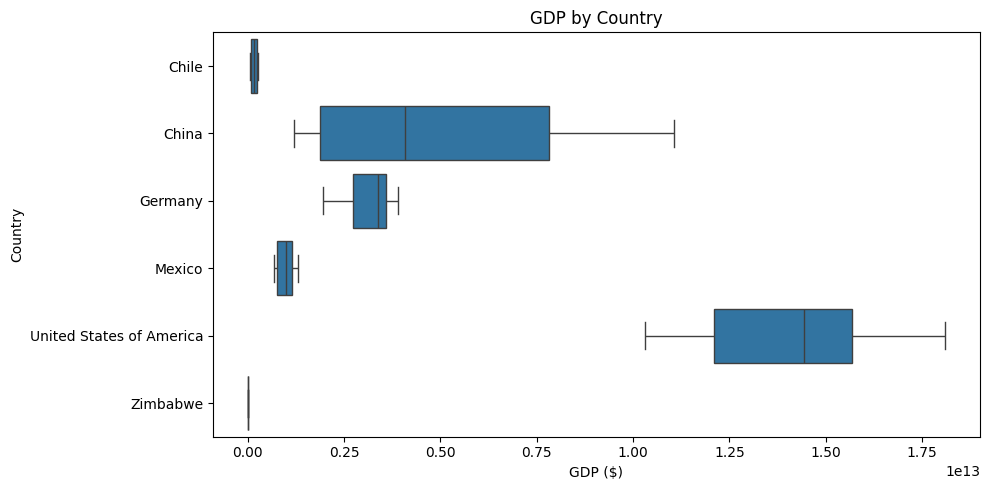

Median GDP per country, descending:
United States of America median GDP: $ 1.44E+13
China median GDP: $ 4.08E+12
Germany median GDP: $ 3.40E+12
Mexico median GDP: $ 1.00E+12
Chile median GDP: $ 1.73E+11
Zimbabwe median GDP: $ 6.73E+09


In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='GDP', y='Country', data=df)
plt.title('GDP by Country')
plt.ylabel('Country')
plt.xlabel('GDP ($)')
plt.tight_layout()
plt.show()

print('Median GDP per country, descending:')
countries = ['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']
for country in countries:
    gdp_median = df[df['Country'] == country]['GDP'].median()
    print(f"{country} median GDP: $ {gdp_median:.2E}")

#### Interesting... 🤔

- USA has the highest GDP, followed by China, Germany, Mexico, Chile, and Zimbabwe.
- The USA's median GDP (~1.4E+13) is around 3.5x higher than the next highest median, China (~4.1E+12).
- As suspected in the previous section, all but two of the outliers are from the USA, with the highest GDP being ~1.8E+13.

# Deeper Dive 🤿

Now let's return to our Big Questions...

### 1. How has **life expectancy** changed over time for the countries in the dataset?

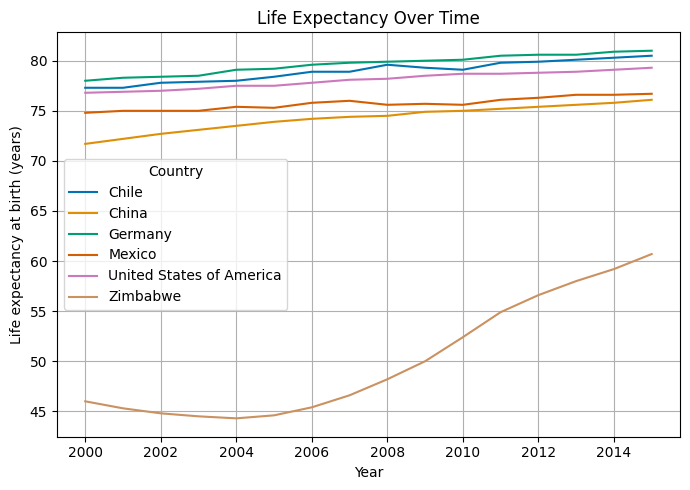

In [11]:
plt.figure(figsize=(7, 5))
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=df, palette='colorblind')
plt.title('Life Expectancy Over Time')
plt.ylabel('Life expectancy at birth (years)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Interesting... 🤔

- Life expectancy for all but Zimbabwe are relatively similar, with a range of ~10 years.
- Life expectancy for all countries increased over time with the exception of Zimbabwe, which experienced a decline in life expectancy from 2000 to 2004, which coincided with their [high rates of HIV/AIDS](https://www.bbc.com/news/world-africa-42013720). However, since 2004 life expectancy rose to around 60 years in 2015, which was still 16 years lower than the next lowest country in the dataset (China).

### 2. How has **GDP** changed over time for the countries in the dataset?

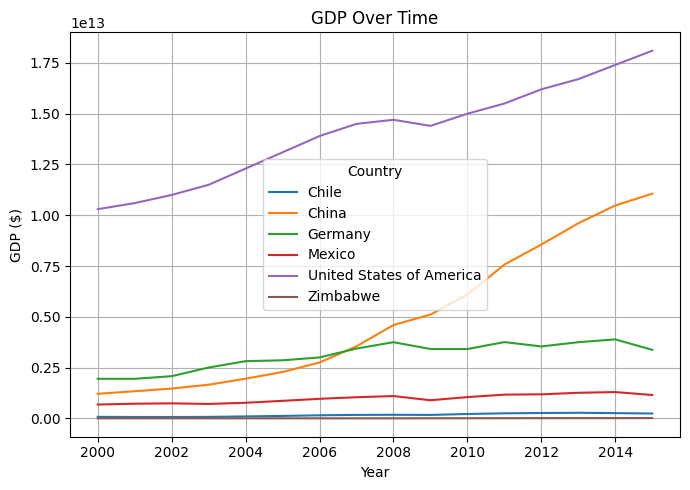

In [16]:
plt.figure(figsize=(7, 5))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
sns.set_palette('colorblind')
plt.title('GDP Over Time')
plt.ylabel('GDP ($)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

GDP for USA, China, Germany and Mexico clearly increased over time but Chile and Zimbabwe are difficult to guage due to the scale, so the following plot shows the GDP growth rate for each country, with a horizontal line at 0 to indicate positive or negative change.

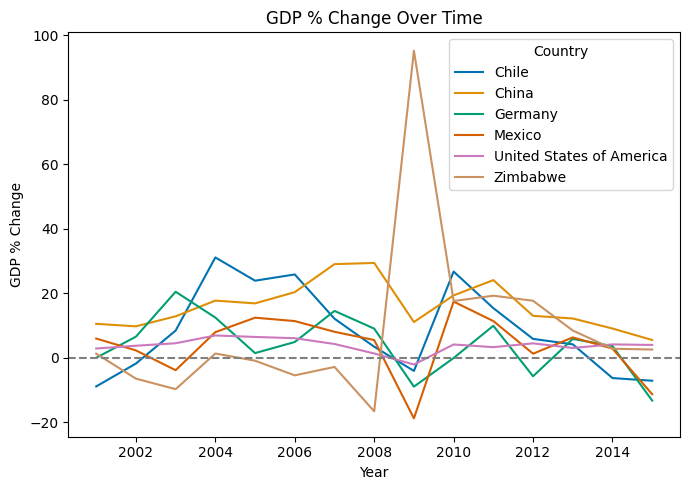

In [10]:
plt.figure(figsize=(7, 5))
sns.set_palette('colorblind')

for country in df['Country'].unique():
    country_df = df[df['Country'] == country].copy()
    country_df['GDP % change'] = country_df['GDP'].pct_change() * 100
    sns.lineplot(x='Year', y='GDP % change', data=country_df, label=country)

plt.title('GDP % Change Over Time')
plt.ylabel('GDP % Change')
plt.xlabel('Year')
plt.axhline(0, color='grey', linestyle='--')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

#### Interesting... 🤔

- Only China has managed to maintain a positive growth rate in GDP for all 16 years.
- All other countries have experienced at least one year when GDP has declined, but the overall trend is positive for all, visually identifiable by the area under the curve being greater than 0 for all.
- Zimbabwe has experienced the most volatile GDP growth rate, with a significant increase in 2009, which coincides with them [adopting the US dollar](https://www.bbc.com/news/world-africa-42013720) as their official currency.

### 3. Is there a **correlation** between GDP and life expectancy?

There are various methods to measure correlation between two variables, each with their own assumptions and therefore relevance to our dataset. For now, we will calculate using three common methods: Pearson, Spearman and Kendall but the latter is more reliable for our dataset - see the [appendix](#appendix) for justification. 

#### Country Focus

Our main interest is the correlation between GDP and life expectancy for each country, so let's assess the linearity of correlation between the two variables using regression plots.

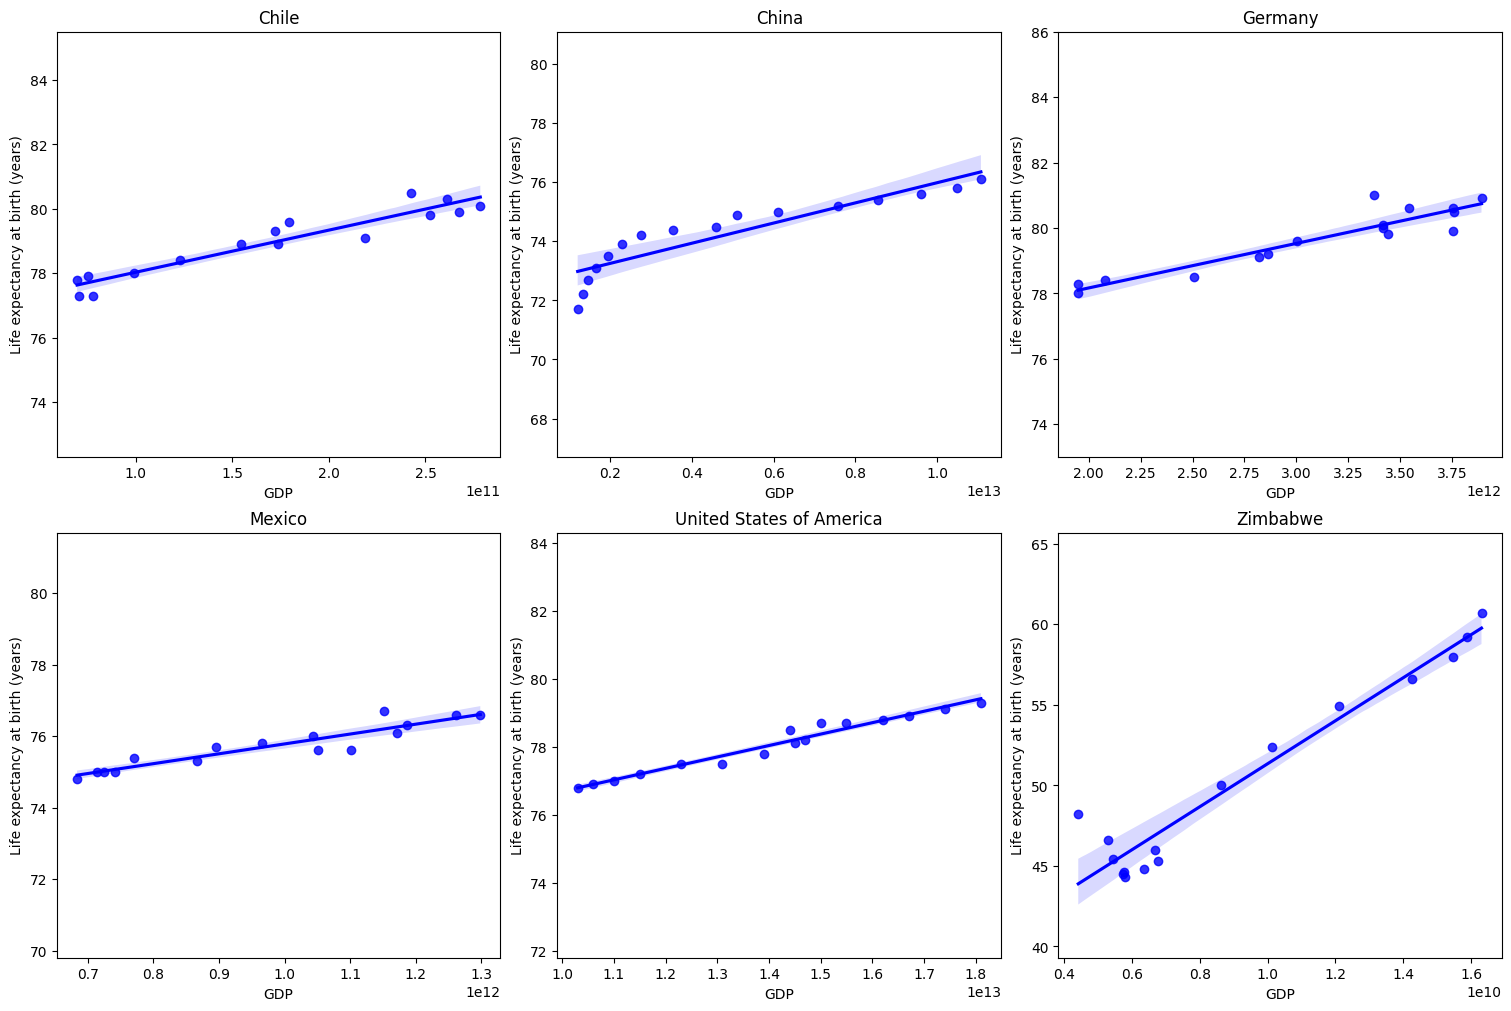

In [14]:
countries = df['Country'].unique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, country in enumerate(countries):
    ax = axes[i]
    country_data = df[df['Country'] == country]
    sns.regplot(x='GDP', y='Life expectancy at birth (years)', data=country_data, color='b', ax=ax)
    ax.set_title(country)
    ax.set_ylim(country_data['Life expectancy at birth (years)'].min() - 5, country_data['Life expectancy at birth (years)'].max() + 5)
    ax.set_xlabel('GDP')
    ax.set_ylabel('Life expectancy at birth (years)')

plt.show()

All but China and Zimbabwe have a moderate positive linear relationship between GDP and life expectancy. China and Zimbabwe both have curved shapes, which suggests a non-linear relationship between the two variables. This is further supported by the confidence intervals for the regression lines (shown by the size of the shaded area) which suggest a notable amount of uncertainty in the relationship between GDP and life expectancy in those regions.

We can calculate the correlation coefficients for each country as follows:

In [18]:
results = []

for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    pearson_corr = country_data['GDP'].corr(country_data['Life expectancy at birth (years)'], method='pearson')
    spearman_corr = country_data['GDP'].corr(country_data['Life expectancy at birth (years)'], method='spearman')
    kendall_corr = country_data['GDP'].corr(country_data['Life expectancy at birth (years)'], method='kendall')
    
    results.append({
        'Country': country,
        'Pearson': f"{pearson_corr:.3f}",
        'Spearman': f"{spearman_corr:.3f}",
        'Kendall': f"{kendall_corr:.3f}"
    })

correlation_results = pd.DataFrame(results)

print(correlation_results)

                    Country Pearson Spearman Kendall
0                     Chile   0.950    0.928   0.790
1                     China   0.909    1.000   1.000
2                   Germany   0.933    0.845   0.728
3                    Mexico   0.932    0.919   0.792
4  United States of America   0.982    0.990   0.958
5                  Zimbabwe   0.966    0.753   0.617


By all measures of correlation, there is a strong positive relationship between GDP and life expectancy for all countries. Our most reliable measure (Kendall) suggests slightly lower values for Germany and Zimbabe (0.617 minimum), but anything above 0.5 is considered a strong correlation.

# Closing Thoughts 🤔

Generally, life expectancy and GDP has increased over time for all countries, suggesting a positive correlation between these two variables. These were quantified using various methods, all indicating a **strong positive relationship** between GDP and life expectancy.

# Appendix

## Methods and Interpretations

Here's a summary of three common methods, namely Pearson, Spearman, and Kendall along with their suitability (👍) or not (👎) for our dataset:

| **Method** | **Assumptions** |
| - | - |
| **Pearson*** | Continuous only 👍<br/>Normally distributed 👎<br>Linear relationship 👍 (4 out of 6 countries)<br>Homoscedasticity 👎 (read on!) |
| **Spearman** | Ordinal or continuous 👍<br>Monotonic relationship 👎<br>No need for normal distribution 👍 |
| **Kendall** | Ordinal or continuous 👍<br>Monotonic relationship 👎<br>Robust to small sample sizes and ties 👍👍 |

*Denoted by the symbol 'r', the Pearson correlation coefficient is directly related to the coefficient of determination (R^2) which is the square of the correlation coefficient.

In all cases the coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. Due to Kendall's giving lower values than Pearson's and Spearman's for the same data, the values are interpreted slightly differently:

- Weak correlation: 0&plusmn;0.3 (0&plusmn;0.2 for Kendall)
- Moderate correlation: 0.3 to 0.7 or (0.2 to 0.5 for Kendall) - same for negative values.
- Strong correlation: 0.7 to 1.0 (0.5 to 1.0 for Kendall) - same for negative values.

We have already assessesed distribution [here](#life-expectancy-) and [here](#gdp-). We have also checked for linearity [here](#3-is-there-a-correlation-between-gdp-and-life-expectancy). Now let's check for **homoscedasticity**.

### Homoscedasticity

Homoscedasticity is the assumption that the residuals (differences between observed and predicted values) are equal across all levels of the independent variable.

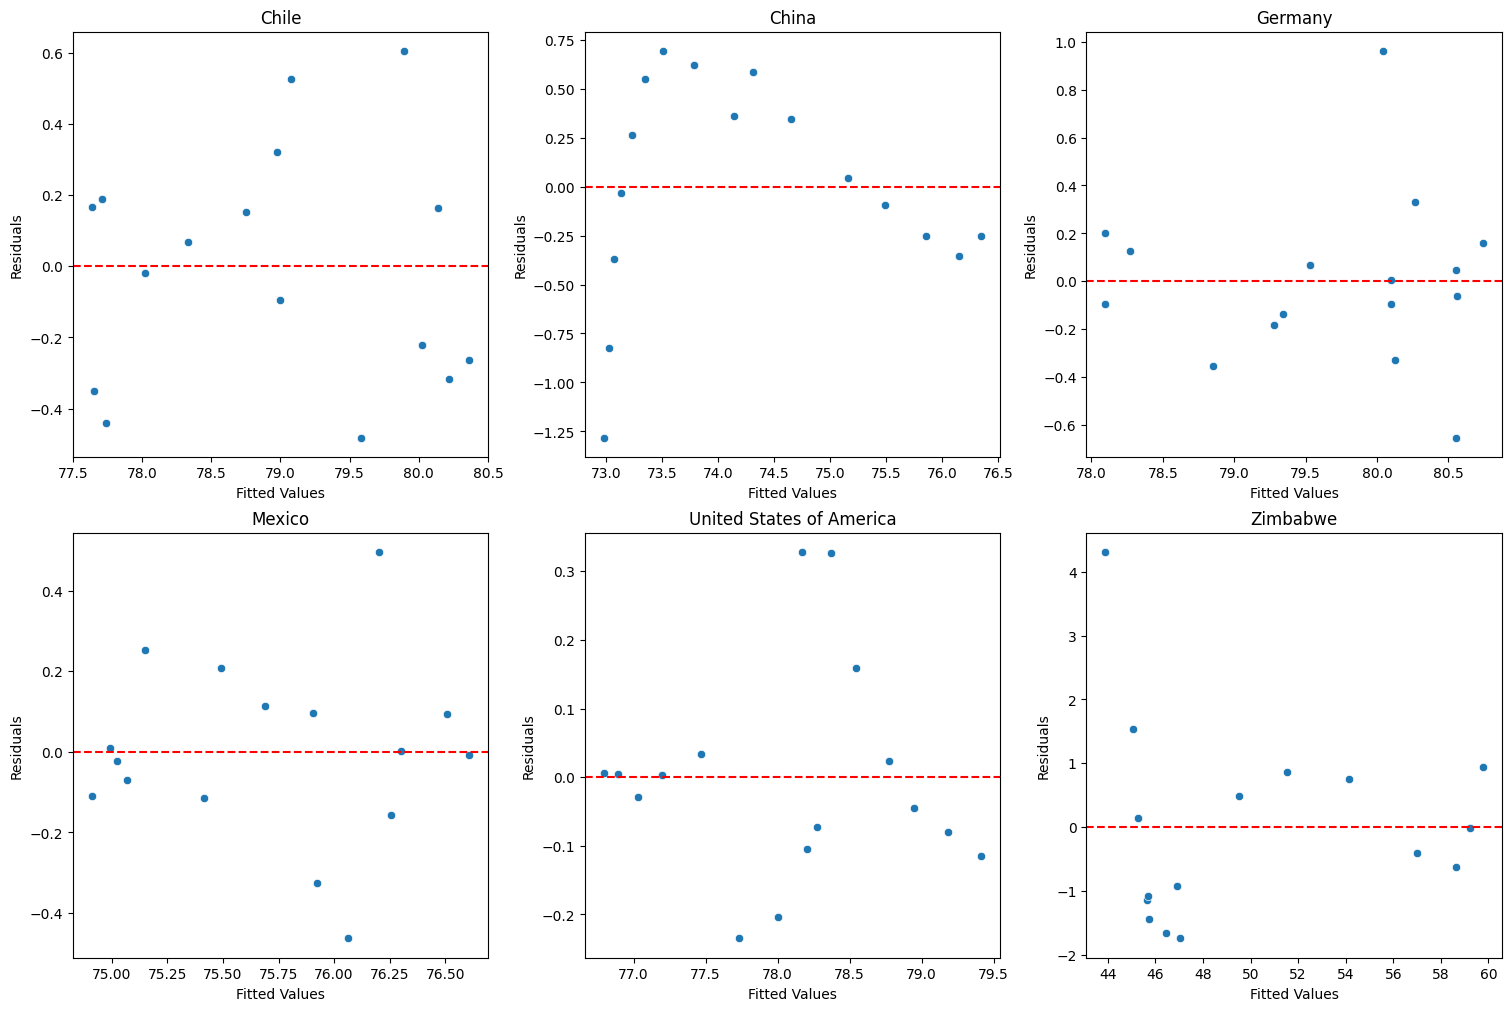

In [17]:
countries = df['Country'].unique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each country and plot the residuals
for i, country in enumerate(countries):
    ax = axes[i]
    country_data = df[df['Country'] == country]
    
    # Fit a regression model
    X = sm.add_constant(country_data['GDP'])
    model = sm.OLS(country_data['Life expectancy at birth (years)'], X).fit()
    fitted_values = model.predict(X)
    residuals = country_data['Life expectancy at birth (years)'] - fitted_values
    
    # Plot the residuals
    sns.scatterplot(x=fitted_values, y=residuals, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_title(country)
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')

plt.show()

Similar to the linearity measure, residuals are not equal across all levels of GDP for China and Zimbabwe. Therefore, homoscedasticity is not met, and any values for Pearson's correlation coefficient may not be reliable.

## All Countries and Years

We could also evaluate correlations across all countries and years, but due to the spread of data, this may be of limited practical use.

In [54]:
# Calculate the correlation coefficients
pearson_corr = df['Life expectancy at birth (years)'].corr(df['GDP'], method='pearson')
spearman_corr = df['Life expectancy at birth (years)'].corr(df['GDP'], method='spearman')
kendall_corr = df['Life expectancy at birth (years)'].corr(df['GDP'], method='kendall')

# Format the correlation coefficients to 3 decimal places
pearson_corr = f"{pearson_corr:.3f}"
spearman_corr = f"{spearman_corr:.3f}"
kendall_corr = f"{kendall_corr:.3f}"

# Create a DataFrame to display the results in a table
correlation_results = pd.DataFrame({
    'Method': ['Pearson', 'Spearman', 'Kendall'],
    'Correlation Coefficient': [pearson_corr, spearman_corr, kendall_corr]
})

# Print the results
print(correlation_results)

     Method Correlation Coefficient
0   Pearson                   0.343
1  Spearman                   0.447
2   Kendall                   0.370


**Across all the countries and years in the dataset**, the correlation coefficients between GDP and life expectancy ranges between 0.343 and 0.447, which suggests a moderate positive linear relationship between the two variables.

## Year Focus

We could also look at how life expectancy vs GDP correlate for each year, where each datapoint on any particular plot represents a different country. Again, due to the spread of data, this may be of limited practical use.

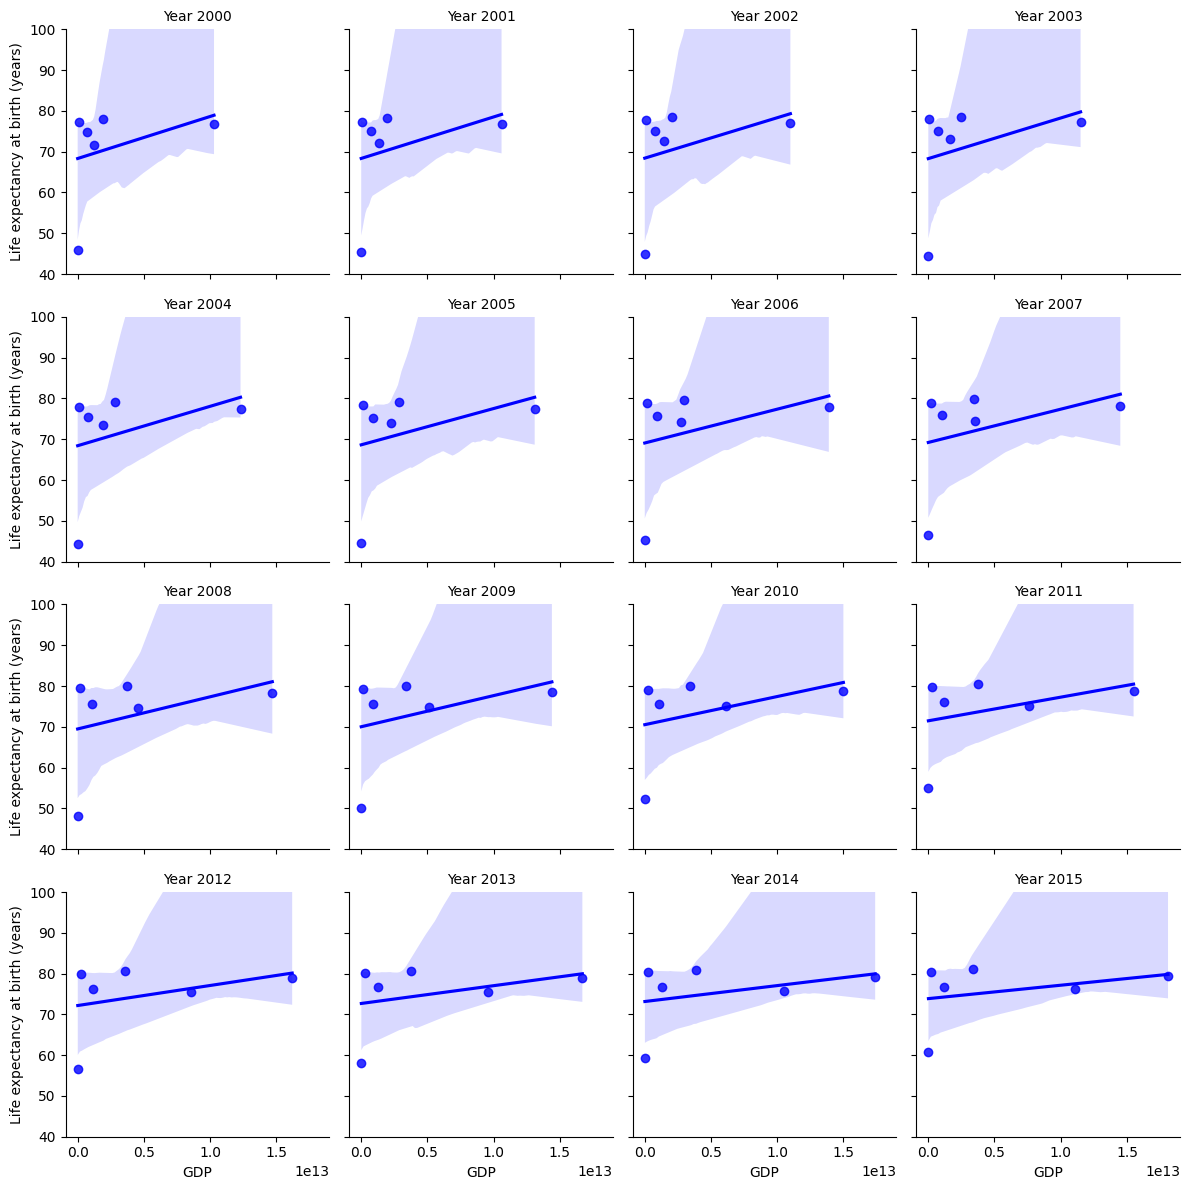

In [35]:
g = sns.FacetGrid(df, col='Year', col_wrap=4, height=3)
g.map(sns.regplot, 'GDP', 'Life expectancy at birth (years)', color='b')
g.set_titles('Year {col_name}')
g.set(ylim=(40, 100))
plt.tight_layout()
plt.show()

Note: the confidence intervals for the regression lines (shown by the size of the shaded area) suggest a significant amount of uncertainty in the relationship between GDP and life expectancy, suggesting the correlation is not linear.

In [56]:
# Initialize an empty list to store the results
results = []

# Loop through each year and calculate the correlation coefficients
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    pearson_corr = year_data['GDP'].corr(year_data['Life expectancy at birth (years)'], method='pearson')
    spearman_corr = year_data['GDP'].corr(year_data['Life expectancy at birth (years)'], method='spearman')
    kendall_corr = year_data['GDP'].corr(year_data['Life expectancy at birth (years)'], method='kendall')
    
    # Append the results to the list
    results.append({
        'Year': year,
        'Pearson': f"{pearson_corr:.3f}",
        'Spearman': f"{spearman_corr:.3f}",
        'Kendall': f"{kendall_corr:.3f}"
    })

# Create a DataFrame from the results
correlation_results = pd.DataFrame(results)

# Display the DataFrame
print(correlation_results)

    Year Pearson Spearman Kendall
0   2000   0.330    0.486   0.333
1   2001   0.326    0.486   0.333
2   2002   0.322    0.486   0.333
3   2003   0.333    0.486   0.333
4   2004   0.339    0.486   0.333
5   2005   0.333    0.486   0.333
6   2006   0.332    0.486   0.333
7   2007   0.350    0.257   0.200
8   2008   0.359    0.257   0.200
9   2009   0.364    0.257   0.200
10  2010   0.376    0.257   0.200
11  2011   0.360    0.257   0.200
12  2012   0.345    0.257   0.200
13  2013   0.339    0.257   0.200
14  2014   0.335    0.257   0.200
15  2015   0.317    0.257   0.200


Over the 16 years of data collection (2000-2015), the correlation between GDP and life expectancy fluctuates between low to moderate positive linear relationships.